In [1]:
#Coding With Qiskit S2E6 Quantum Machine Learning

import qiskit
from matplotlib import pyplot as plt
import numpy as np
from qiskit.ml.datasets import ad_hoc_data
from qiskit import BasicAer
from qiskit.aqua import QuantumInstance
from qiskit.circuit.library import ZZFeatureMap
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils import split_dataset_to_data_and_labels, map_label_to_class_name

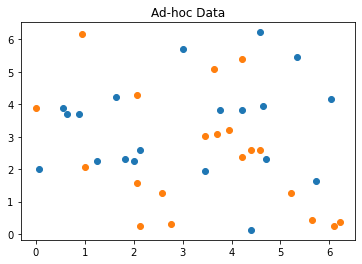

{'A': 0, 'B': 1}


In [2]:
feature_dim = 2
training_data_set_size = 20
testing_data_set_size = 10
random_seed = 10598
shot = 10000

sample_Total, training_input, test_input, class_labels = ad_hoc_data(training_size=training_data_set_size, 
                                                                     test_size=testing_data_set_size, 
                                                                     gap = 0.3, 
                                                                     n=feature_dim, 
                                                                    plot_data=True)
datapoints, class_to_label = split_dataset_to_data_and_labels(test_input)
print(class_to_label)

kernel matrix during the training:


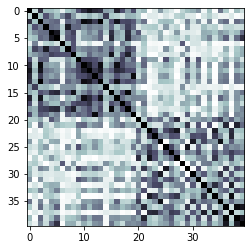

In [3]:
backend = BasicAer.get_backend('qasm_simulator')
feature_map = ZZFeatureMap(feature_dim, reps=2)
svm = QSVM(feature_map, training_input, test_input, None)
svm.random_seed = random_seed
quantum_instance = QuantumInstance(backend, shots=shot, seed_simulator=random_seed, seed_transpiler=random_seed)
result = svm.run(quantum_instance)

print("kernel matrix during the training:")
kernel_matrix = result['kernel_matrix_training']
img = plt.imshow(np.asmatrix(kernel_matrix), interpolation='nearest', origin='upper', cmap='bone_r')
plt.show()

In [4]:
#computed distance from kernel in higher dimensional space
#diagonal black line shows that the distance from each point to itself is 0

In [5]:
predicted_labels = svm.predict(datapoints[0])
predicted_classes = map_label_to_class_name(predicted_labels, svm.label_to_class)
print("ground truth:  {}".format(datapoints[1]))
print("prediction:    {}".format(predicted_labels))
print("testing success reation: ", result['testing_accuracy'])

ground truth:  [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
prediction:    [0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]
testing success reation:  1.0
